# <div  style="color:#303030;font-family:'arial blACK', sans-serif,monospace; text-align: center; padding: 50px 0; vertical-align:middle;" > <img src="https://www.nicepng.com/png/full/204-2043038_white-lightbulb-icon-light-bulb-icon-white.png" style=" background:#00a0e4;border-radius:10px;width:150px;text-align:left; margin-left:10%"  /> <span style="position:relative; bottom:70px; margin-left:5%"> Real-time Analytics </span> </div>

## <span style="color:#00a0e4;"> Keywords: </span>

```Electromyography (EMG)```, ```Python```, ```Biofeedback System```

# I. Introduction
<br>
<div style="width:100%; background:#00a0e4;font-family:'arial black',monospace; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" >  </div>


## <div style="color:#00a0e4;"> 1. Background </div>


From simple raw digitized data conversion (e.g. to the original physical
units), to live extraction of metrics from acquired data, ranging through online
triggering of certain actions, multiple practical use cases often require data to be
handled in real-time. Building upon the knowledge acquired so far, in this lesson
we will experiment with real-time analytics, using Electromyography (EMG)
signals as a case study, and BITalino and the Python programming language
as support tools. You will have the chance to observe how different theoretical
concepts can come together and be transposed to your own programs through
the combination of elementary sets of operations.

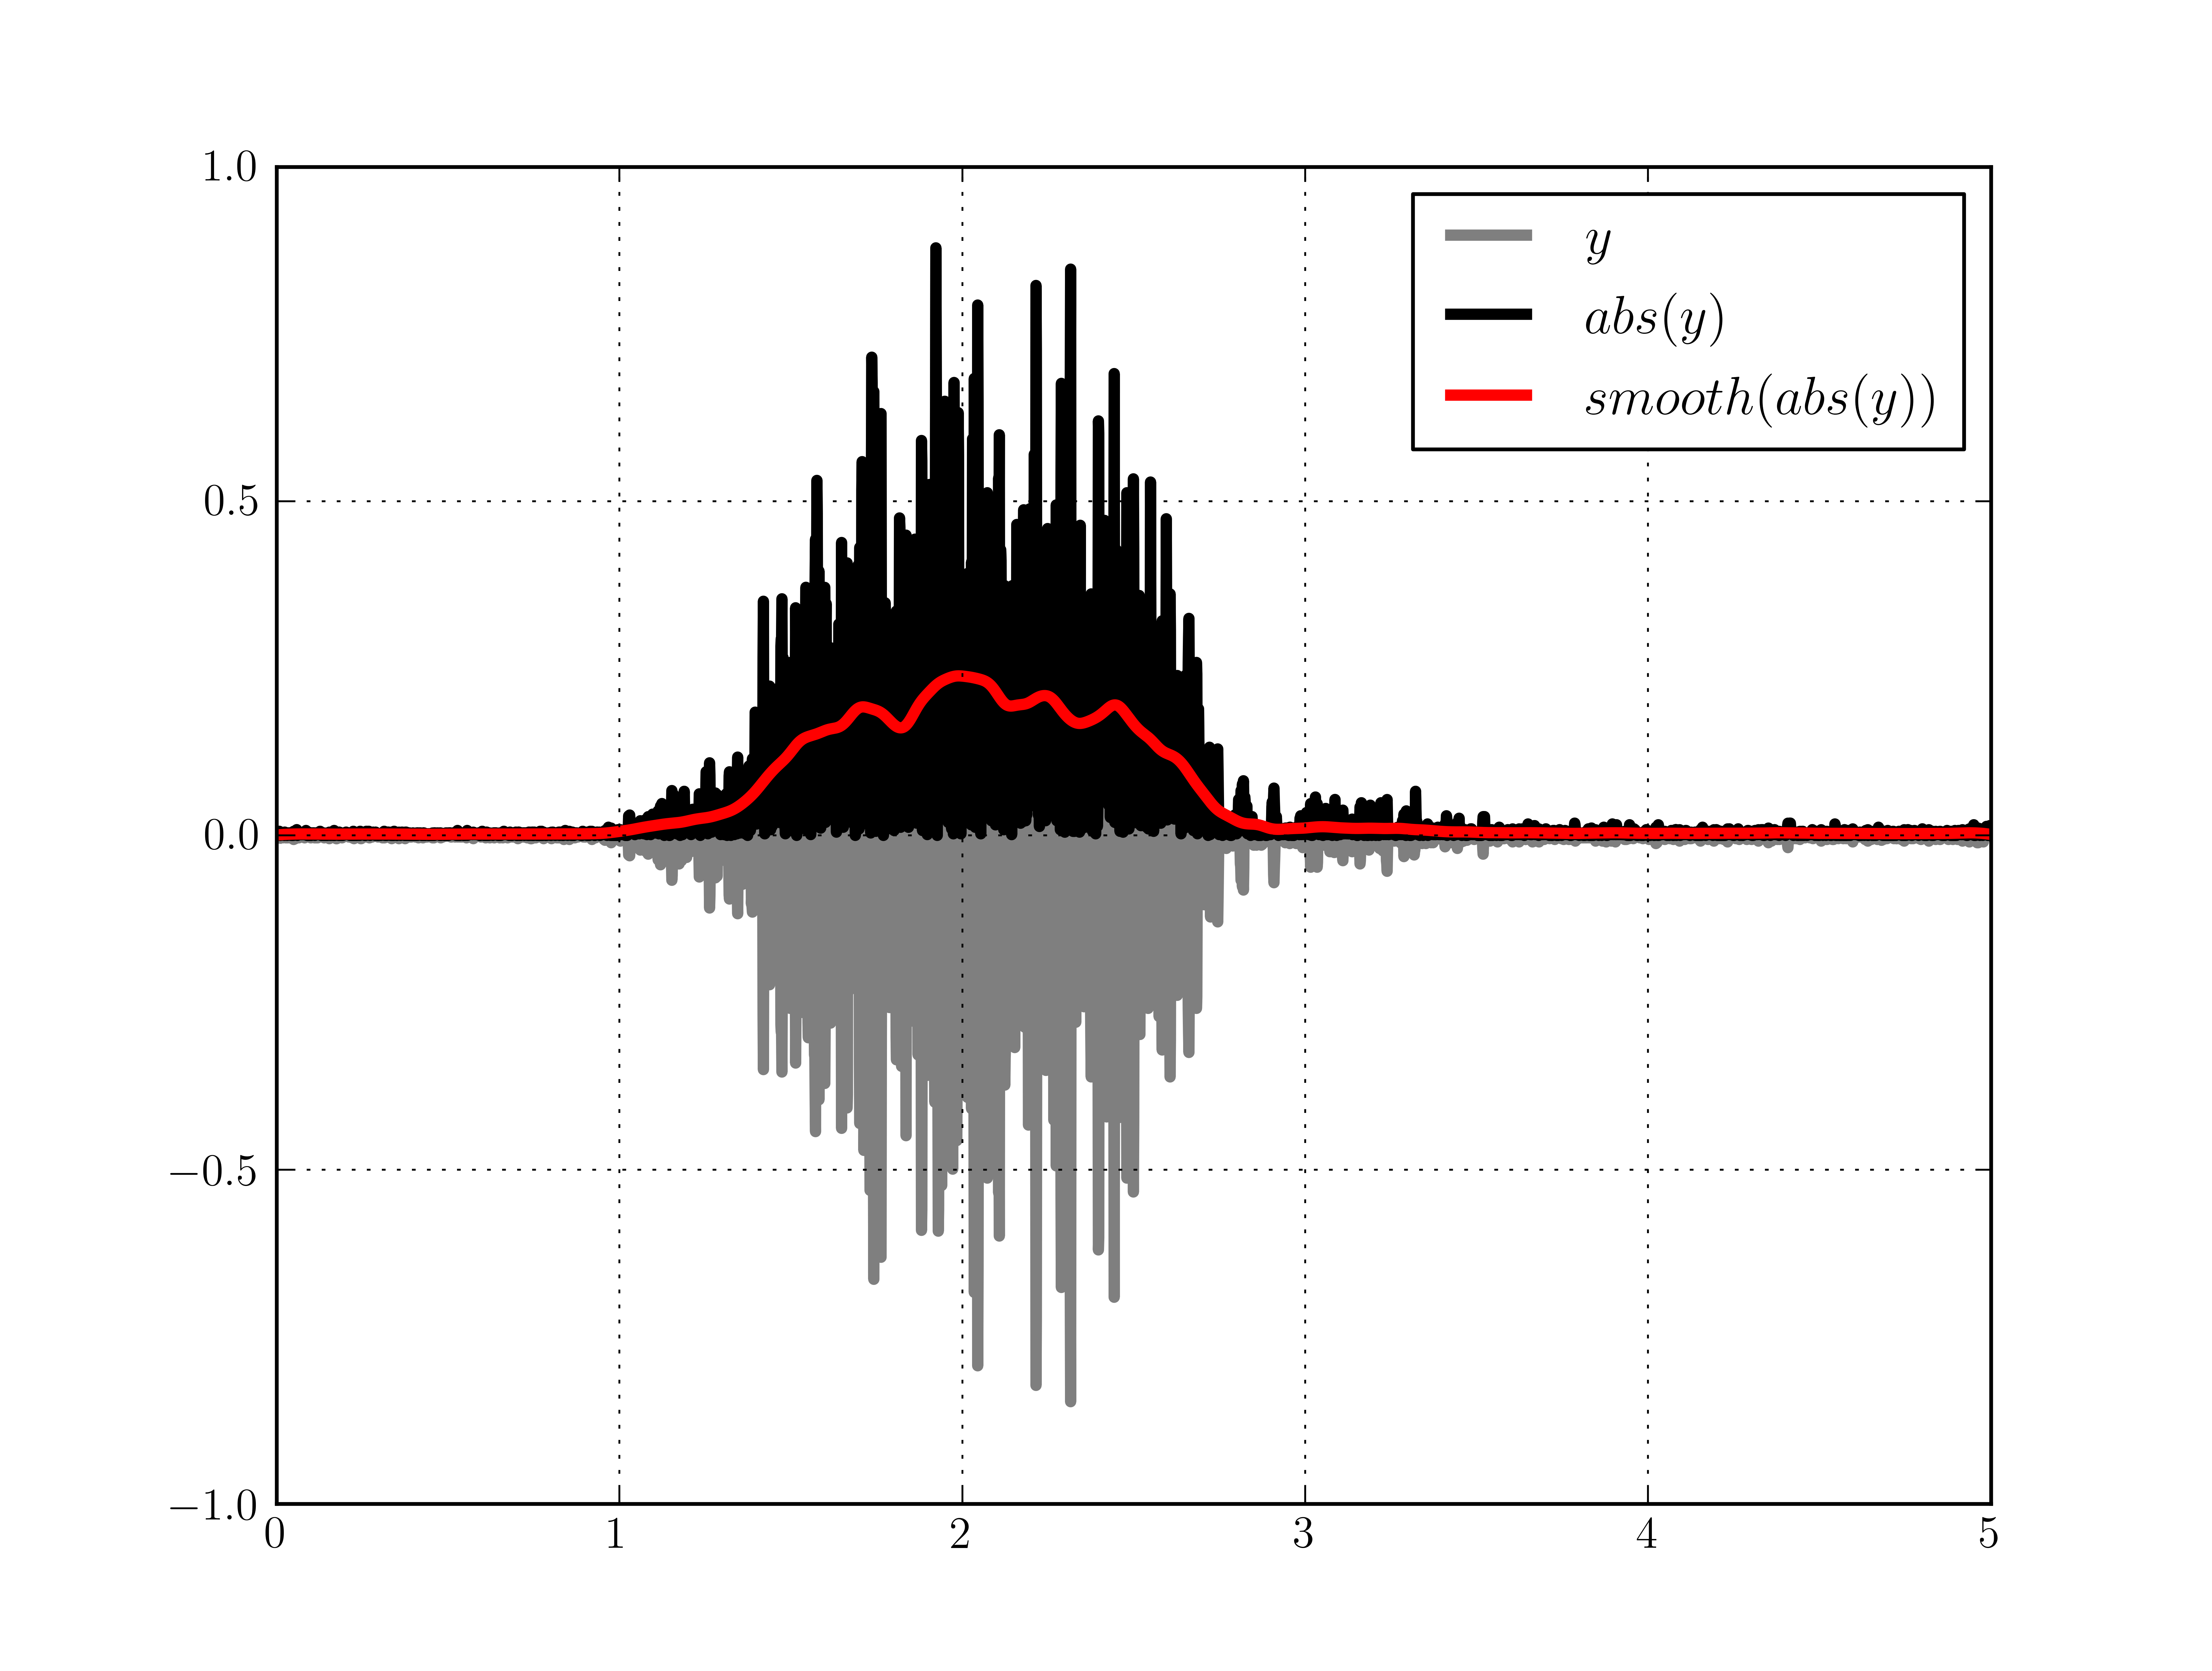

## <div style="color:#00a0e4;"> 2. Objectives</div>
* Learn how to convert the digital codes produced by an Analog-to-Digital
Converter (ADC), as a result of the sampling process, into the original
physical units through a transfer function
* Understand how to extract common metrics from a data stream using the
Python programming language
* Implement a basic real-time biofeedback system using online Electromyographic (EMG) onset detection


## <div style="color:#00a0e4;"> 3. Materials</div>
* Anaconda Python 2.7
* BITalino Python API
* 1x BITalino (r)evolution Board BT
* 1x 3.7V LiPo battery
* 1x 3-lead electrode cable
* 3x Electrodes
* 1x Bluetooth adapter (optional)

# II. Experimental
<br>
<div style="width:100%; background:#00a0e4;font-family:'arial black',monospace; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" >  </div>


This section should guide the students during their experimental procedure, and contain the most relevant content.

## <div style="color:#00a0e4;">  1. Electromyography (EMG)</div>


### <div style="color:#00a0e4;">1.1. How do muscles work? </div>


    Lets imagine we grab an object like a pen or our mobile phone; the grasping action required, involves the use of a series of muscles in our forearm (e.g. forearm flexors), the result of which is the curling of our fingers at a given tension and angle. In fact, most of the tasks that we perform on a daily basis, including those that keep us alive (e.g. breathing), are only possible due to an intricate network of strategically arranged muscle fibers scattered across our body (and fortunately there are quite a few). Although for us the whole processes are almost innate and instinctive, the knobs and gears turning inside our body to do so are quite remarkable. Whenever we perform an action that involves the use of our muscles, the visible results are actually the response to a burst of electrical stimuli being fired onto the muscle fibers in the follow-up of command signals sent by the brain. For example, our brain has a cluster of nerve cells dedicated to the handling of motor activity (the upper motor neurons); a single motor neuron can control thousands of muscle fibers, in the case of large muscles like the biceps, or only a few dozens, in the case of fine muscles like the ones that control our eyes. Once issued by the upper motor neurons, the control signals are propagated through the spinal cord down to the lower motor neurons, located in the spinal cord. In turn, the lower motor neurons trigger an action potential, which causes an electrochemical reaction in the interface between the nerve and the muscle fiber, ultimately leading to the muscle contraction.
    
            Illustration of the circuit between the upper motor neurons (where the sequence of steps to perform a given motor task is triggered) and the muscle fibers:

<img src="attachment:Motoneuron.png" width="450">

            source: http://medical-dictionary.thefreedictionary.com/Motorneuron

    This otherwise long story has a pretty straightforward outline: you think of an action (and in some bodily functions do not even need to think), messages are sent by the brain to the muscles, the muscle fibers are bombed with electrochemical activation impulses (aka action potentials), voltage imbalances are originated within the muscle cells causing them to contract, and all these actions happen quicker than a blink of an eye (in just a few  milliseconds). The good news for us is that this can be measured pretty easily and used for both fun and serious applications alike, as shown in this lesson.

### <div style="color:#00a0e4;"> 1.2. Relevant Muscle Characteristics  </div>

    It is important to keep in mind that across our body, there are different types of muscles, with specialised 
    functions. 
    There are three major types of muscles, namely:
        • Smooth Muscles, generally controlled by the autonomic nervous system (involuntarily), in which cells have a variable length in the order of 0.1 mm; these are found in more visceral or hollow organs, such as the digestive tract, wall of the trachea, uterus, and bladder.
        • Striated Muscles (aka skeletal muscles because of their anatomical location), controlled voluntarily and mostly composed of large fibers ranging from 0.01-0.1 mm to 1-40 mm in length; these are found in organs and structures associated with skeleton support and motion. 
        • Cardiac Muscle that, while similar in nature to skeletal muscles, has several distinctive properties; in particular, it is not controlled voluntarily, when excited generates much longer electrical impulses (around 300 ms), and has an intricate electrical conduction system that allows the propagation of the electrical activity of one muscle cell through surrounding cells.

    There are multiple direct and indirect methods that can be used to sense functional muscle activity, however, one of the most robust is generally the direct measurement of the electrical manifestations of the aforementioned action potentials, or of an aggregate of the same. As a whole the process is known as Electromyography (EMG), a term that derives from electro (i.e. related to or caused by electricity), myo (i.e. combining form of muscles), and graphy (i.e. descriptive outcome). As measured on the body surface, EMG signals are typically in the order of millivolt or even microvolt (i.e. 1000 to 10000 times less voltage than what is used to power your phone), depending on the number of fibers composing the muscle being measured, which is inherently related with their size. Given the feeble nature of EMG signals, they are  quite sensitive to noise sources (e.g. motion artifacts or electromagnetic interferences), and usually signal conditioning procedures are needed to obtain a workable resulting output.

## <div style="color:#00a0e4;">  1.3. Electrodes and Their Placement  </div>

    The first step in the process of muscle sensing is the interface between the electronic circuitry and the muscle (aka electrode), which mainly seeks to maximize the electrical conductivity, and minimize mechanical artifacts (through adherence). There are two major classes of EMG in what concerns the electrode placement, namely the intramuscular EMG  (iEMG) and surface EMG (sEMG). In iEMG, fine wire needle electrodes (fully insulated except at the tip) are used to penetrate through the skin, and the goal is muscule activity measurement at the fiber level. In sEMG, the electrodes are placed at the skin surface and the goal is to measure the muscle activity non-invasively, albeit as an aggregate  activity with contribution from all muscle groups and fibers in the vicinity of the electrode placement. Thw following figure shows the anatomy of a medical-grade sEMG electrode, including Silver/SilverChloride (Ag/AgCl) pad, conductive  gel, support substrate with adhesive to hold the electrode in place, and other important components to obtain maximum  signal quality.
 
            Anatomy of a medical-grade sEMG electrode:
<img src="attachment:EMGelectrode.png" width="450">


    Although for specialized applications medical-grade electrodes are important, they have several shortcomings, chief  among which are the fact that the adhesive material wears off quickly upon continued use, and that the gel often leaves inconvenient residues in the skin. For some applications (e.g. human-computer interaction), a few of the requirements may be relaxed, with the goal of making the resulting system more user-friendly and easier to maintain over time. Alternative materials include the use of the dry Ag/AgCl electrode core alone, conductive lycra fabrics, conductive ink (e.g. Bare Conductive1 ), stainless steel pads, silver or gold bars, among several others. The following figure shows an example where stainless steel pads are applied to a bracelet for EMG measurement.
    
    
            Stainless steel pads used as electrodes:
<img src="attachment:EMGstainless.JPG" width="350">

With the electrode defined, the next step is to address their placement. As mentioned in Section 7.4.1, action potentials generate voltage imbalances with respect to a baseline (resting) potential. By means of EMG, such an effect can be captured by measuring the voltage difference between one electrode placed on the muscle of interest (or signal) and one electrode placed on an electrically neutral area (the reference) [2]. Given that both electrodes can be far apart, often it happens that the signal electrode is being affected by noise sources that are not affecting the reference electrode in the same way; in order to mitigate this issue and improve the signal quality, EMG signals are typically measured using a bipolar sensor setup. In a bipolar setup, the reference electrode is placed as described before, however, instead of a single signal electrode two differential signal electrodes are used, namely a positive signal lead (IN+) and a negative signal lead (IN- ), and the EMG is measured as the difference between each of the two leads and the reference. With this approach, most noise sources affecting the signal electrode and not the reference are present in both the positive and negative signal leads and canceled or greatly attenuated through the difference between the two. The positive and negative signal leads should ideally be placed over the muscle belly, aligned with the beam of muscle fibers and with 2cm spacing between electrodes. Typical locations for the reference electrode include the elbow, vertebrae, knee, and areas where bone is similarly abundant, however, there are applications (e.g. human-computer interaction), in which the placement of the reference electrode can be relaxed to improve usability and facilitate sensor integration (e.g. can be placed near the positive and negative signal leads), and in many modern sensor designs it may even be unnecessary.

            Illustration of the positive (IN+), negative (IN-) and reference (REF) leads placement in a bipolar configuration for EMG data sensing: 
                    IN+ and IN- leads placement

<img src="attachment:EMGplacement.png" width="200">

                    Reference lead placement:                    
<img src="attachment:EMGreference.png" width="200">

            source: http://www.bartleby.com

### <div style="color:#00a0e4;">3.3. Tools to Measure Muscular Activity  </div>

    As previously mentioned, EMG signals are quite feeble and have a very low amplitude, several orders of magnitude 
    lower than what the typical measurement equipment can handle. It is therefore necessary to amplify them from the 
    original millivolt-level amplitude, to a scale that is less sensitive to noise and that can be managed by an 
    Analog-to-Digital Converter (ADC). Although the activation levels can vary between muscles, an amplification gain 
    of around 1000x is generally found as providing a sensor measurement range suitable for a wide array of applications. 
    In addition to the amplification, filtering is also an important component, to help remove unwanted noise sources and 
    limit the sensor output to the frequency band of interest within muscle signals. The frequency bands of interest
    greatly depend on the application, however the 20-450Hz band is the typical useful range when working with EMG signals
    measured at the body surface (sEMG). Until recently, the tools for EMG sensing were quite costly, complex to manage 
    and deploy in practical do-it-yourself projects, however, nowadays there are a number of off-the-shelve devices that 
    incorporate the required tools to measure sEMG signals in a user-friendly way. An example of such tools is your BITalino,
    which includes an EMG sensor. The IN+ & IN- pins are the input from the signal leads, while REF is the input from the
    reference lead. There are a number of options that can be used to interface the sensor with the body, but the most 
    standard way is to use a cabled connection between the pre-gelled electrodes placed at the body surface and the sensor,
    as shown in the following figure.

            Location of the Electromyography (EMG) sensor on BITalino:
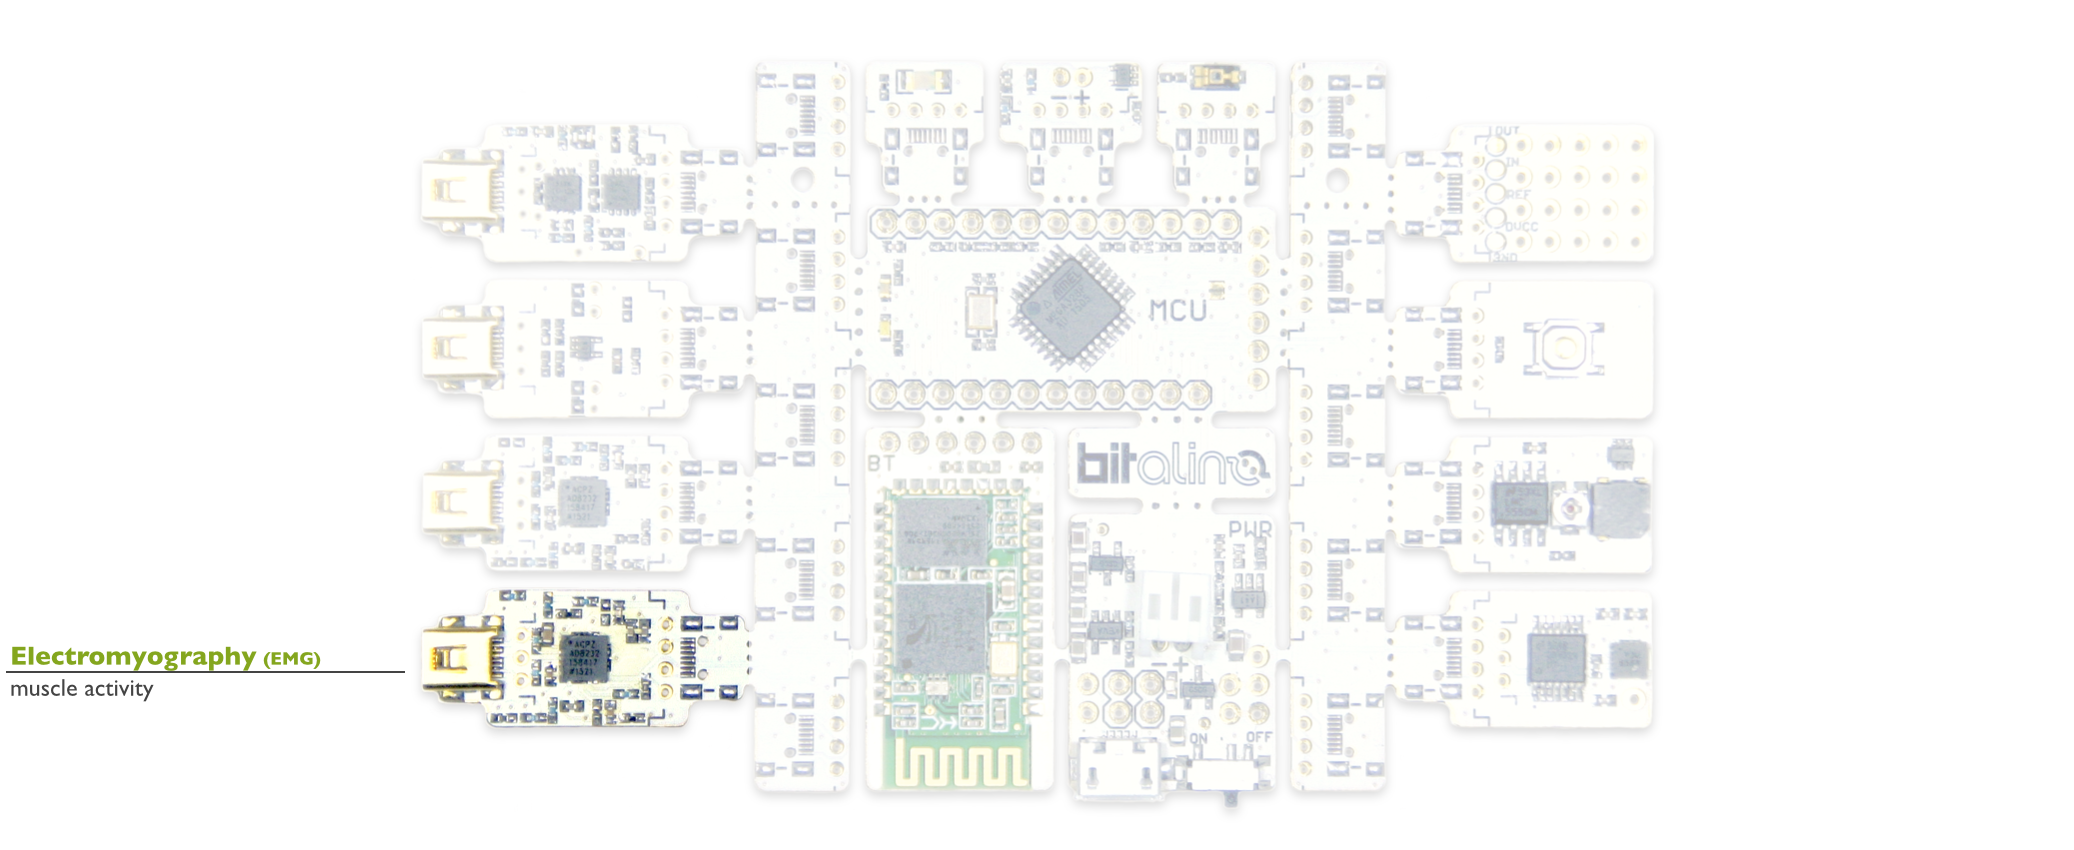

## <div style="color:#00a0e4;">  2. Live Data Conversion and Analysis </div>

    The result of a sampling process done by an acquisition device is generally a set of digital codes produced by the ADC. 
    As we have experienced before, knowing the input voltage with which said ADC is powered, allows one to easily map the  digital codes to the corresponding voltage. However, when the sampled signals are the output of a transducer and/or  undergo through signal conditioning steps before reaching the ADC, these details need to be considered when converting a digital code to its corresponding physical unit. This is the case, for example, of EMG signals sampled with BITalino;  the digital codes produced by the 10-bit ADC range between 0 − 1023, which, considering the 3.3V operating voltage of  the ADC, corresponds to 0 − 3.3V with a quantization step size of 3.3V /1024 ' 3.223mV . Although the later is in fact the voltage measured at the ADC input, the underlying physiological processes have much lower amplitudes, and the only  reason why the signal reaches the ADC as a 0 − 3.3V is the amplification done at the sensor level. In this experiment, we will implement a script to convert sEMG data to its correct physical units in real-time and compute simple metrics  from the signal once the recording stops.
    
        1. Create a new (empty) Python script in the Spyder IDE

        2. Write a script that connects to your BITalino device and performs synchronous real-time data acquisition of 
        channel A1 (to which the sEMG sensor is connected) at 1000Hz, using a repetition structure to continuously read samples and print them on the console for a pre-defined period of time (e.g. 30 seconds) 

        3. Run your script and verify the behaviour; whenever the script is executed, the digital codes produced by the ADC for channel A1 should appear on the console 

        4. Modify your script to show the data converted to millivolt (mV), knowing that the BITalino device has an operating voltage of Vcc = 3.3V and that sEMG sensor output on BITalino is centered at 1.65V = Vcc/2, has an  amplification gain of 1009x, and is sampled with 10-bit resolution (create a function with suitable input  arguments and return values to implement your transfer function) 
        
        5. Adapt the output written to the console to show the units in addition to the converted values
        
        6. Run your script and verify the behaviour; whenever the script is executed, he measurements obtained from channel A1 should appear on the console with the units)
        
        7. Modify your script to accumulate the converted values in a list (or in an rray) and, once the data acquisition stops, print to the console basic time omain and statistical information about the overall recording, namely  maximum, minimum, median, mean and standard deviation.
       
        8. Apply the electrodes to a muscle of your liking, run your script and verify the behaviour when performing a  cycle of CONTRACTION-RELEASE-REST five times, maintaining the contraction for two seconds and resting for two  seconds; try to start with a low intensity contraction and gradually increase the level in each repetition, in  such way that the last corresponds to your maximum voluntary contraction ability.
        
                Example electrode placement on the forearm, with REF in a bone region (electrically neutral), and IN+ (red) 
                & IN- (black) 20mm apart over the muscle belly (aligned with the muscle fibers):
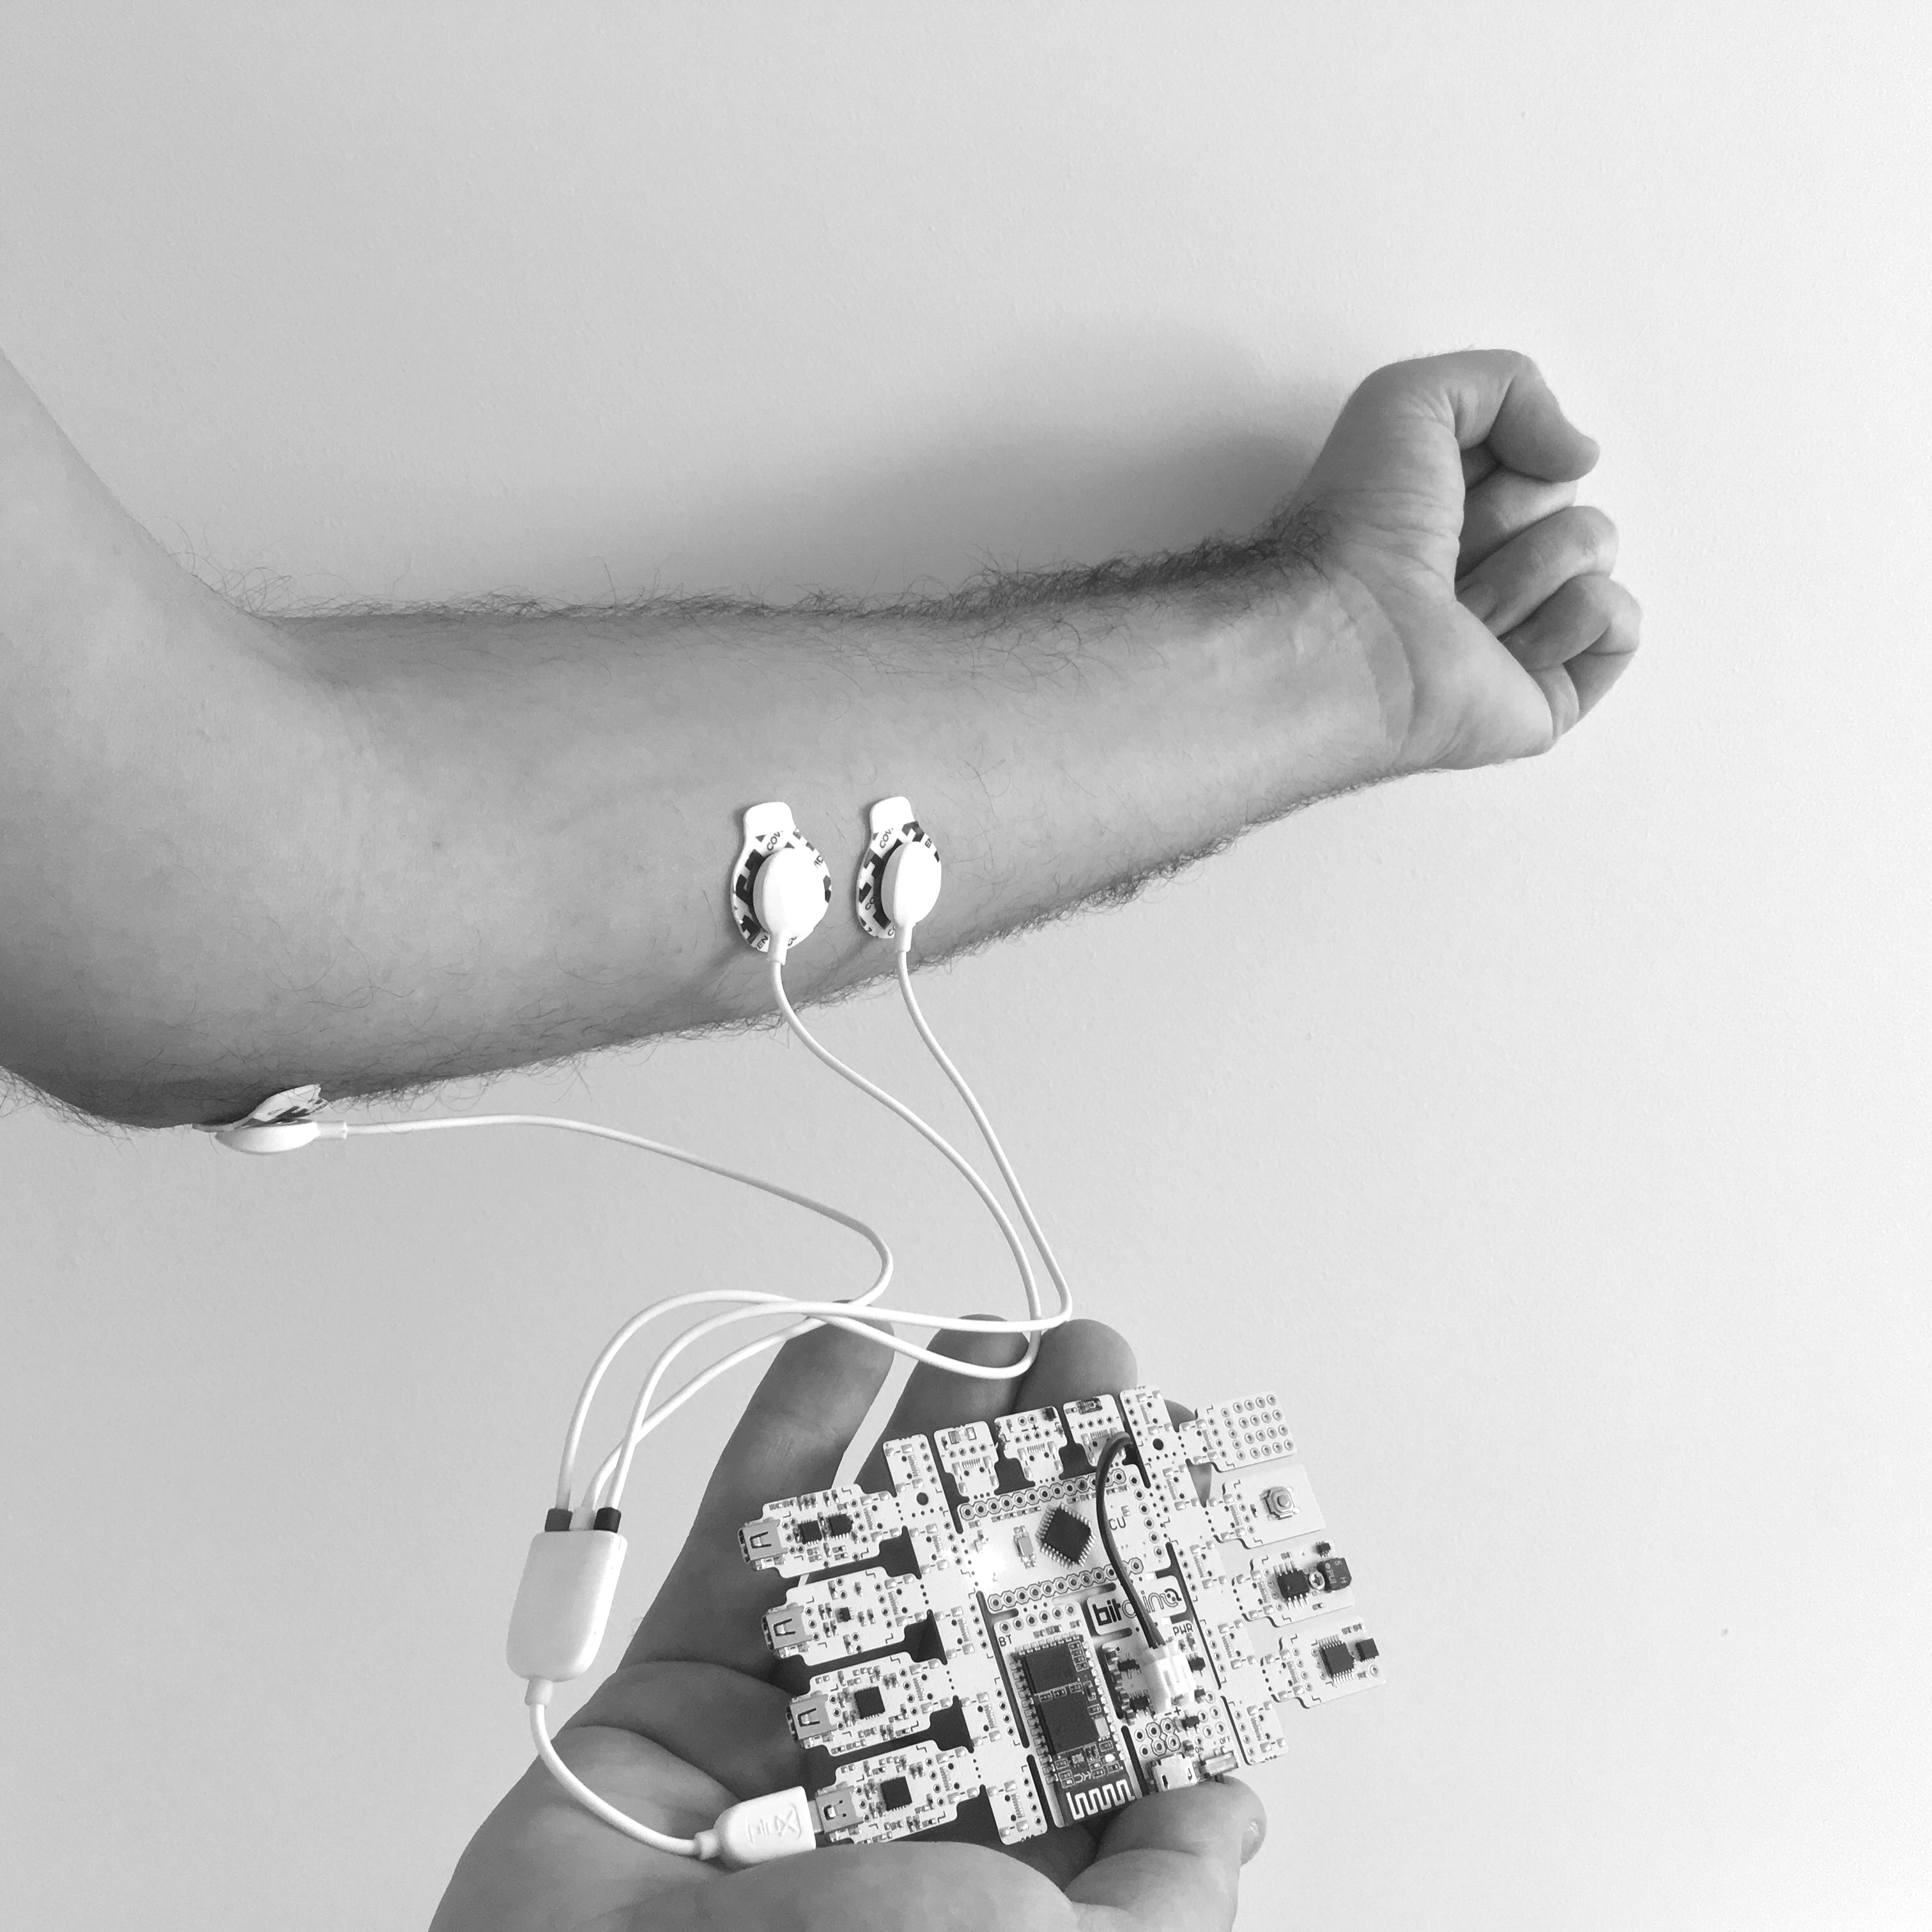

<div style="background:#62d321;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; "> Explore </span> <br>
  <div style="background:#c5e8b0;font-size:12px"> 
    You can confirm the transfer function for the BITalino sEMG sensor
(used in this experiment) on the data sheet available at:
http://bitalino.com/datasheets/REVOLUTION_EMG_Sensor_Datasheet.pdf      
</div>

## <div style="color:#00a0e4;">   3. Online Signal Processing </div>

    Due to the characteristics of some signals, the particular application domain, or other factors (e.g. noise), in many cases it can be utilitary to manipulate the signal as a way of obtaining a more tractable representation. The sEMG is one such case; for example if one want’s to detect a muscle contraction in real time using a thresholding method, the (relatively) high-frequency components in the signal can be challenging to deal with. In this experiment we will implement a basic online sEMG onset detector resulting from the combination of a few elementary operations.

        1. Create a new (empty) Python script in the Spyder IDE
        
        2. Write a script that connects to your BITalino device and performs synchronous real-time data acquisition of channel A1 (to which the sEMG sensor is connected) at 1000Hz, using a repetition structure to continuously read batches of 100 samples for a pre-defined period of time 
        
        3. Select an amplitude threshold that you find suitable and adapt your repetition structure to print a message to the console whenever the signal supersedes that threshold
        
        4. Apply the electrodes to a muscle of your liking, run your script and verify the behaviour; whenever you flex  your muscle, a burst of messages should appear on the console (this means that the threshold is being crossed multiple times for the same muscle contraction event)
        
        5. A more manageable representation of the sEMG signal for the purpose of onset detection is its envelope, computed as a combination of offset removal (i.e. subtracting the mean), rectification (i.e. absolute value) and  finally low pass filtering; modify your script to implement these operations for each batch of 100 samples; for the sake of this exercise you can replace the offset removal by the discrete derivative, and implement the low  pass filter as the mean of the acquired batch of samples
        
        6. Select an amplitude threshold that you find suitable, run your script and verify the behaviour; whenever you flex your muscle, a single message (or at least a lower number of messages) should appear on the console
        
        7. Modify your script in such way that one of the actuators on your device (i.e. LED or BUZ) turns on throughout the duration of an onset event, and is turned off otherwise
        
        8. Run your script and verify the behaviour; the LED or BUZ should turn on while you flex your muscle

<div style="background:#fada5e;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; ">  Warning! </span> <br>
  <div style="background:#fff3c4;font-size:12px"> 
   
   Synchronous data acquisition is generally a time-critical operation, reason for which if your online signal processing steps take up too much computacional time, there is a risk that a cumulative delay will be introduced in the acquisition process. In many cases this can lead to erroneous behaviors and/or loss of communication with the device. A crucial component in this process is, for example, the amount of samples acquired from the device at a time; for additional information you can refer to:
http://forum.bitalino.com/viewtopic.php?t=129#p227    
</div>

## <div style="color:#00a0e4;">   4. Reaction Time Meter </div>

    In the previous exercise, we’ve seen how to detect a particular event within the signal (i.e. the onset). Often, its also useful to relate events detected in the signals with other events. For this experiment, we will build upon the previous work to create a reaction time meter. The goal is to create a script that prompts the user to flex his/her muscle in the form of a visual or acoustic cue, and measures the elapsed time between triggering the cue and the detection of the muscle contraction.

        1. Create a new Python script in the Spyder IDE based on the code developed in Section II.2

        2. Modify your script to turn on the LED or BUZ actuators 20 seconds into the data acquisition process and turn it off at the end

        3. Run your script and confirm the behaviour

        4. Modify your script to memorize the time at which the actuator was triggered and count the elapsed time until a muscle onset is detected

        5. Run your script and confirm the behaviour

        6. The state of the actuators is sent by the device together with the remaining data being acquired; modify your script to, in addition to the information  already computed, determine (from the data received) the number of samples acquired from the moment when actuator was triggered at the device  until a muscle onset is detected, and determine the elapsed time from the relation between the sample count and the sampling rate

        7. Run your script and analyze the results; unlike what you might expect, the times are different given that there is a transmission latency between sending the triggering command from your script and it actually arriving to the device (i.e. Bluetooth transmission time)

<div style="background:#00bfc2;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; ">  Note </span> <br>
  <div style="background:#9eddde;font-size:12px"> 
    The time Python module provides access to a set of functions related
with the handling of time. For this exercise you can use the time()
function, which returns the system time in seconds.    
</div>

<div style="background:#62d321;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; "> Explore </span> <br>
  <div style="background:#c5e8b0;font-size:12px"> 
    You can confirm the structure of the data returned by the read(...)
function made available by the BITalino API at:
http://bitalino.com/pyAPI/#bitalino.BITalino.read   
</div>

# III. Explore
<br>
<div style="width:100%; background:#00a0e4;font-family:'arial black',monospace; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" >  </div>


## <div style="color:#00a0e4;"> 1. Quiz </div>

1. Modify the script from Section II.2 to write (into separate files) the converted values and the computed time 
    domain and statistical information.Open the file with the converted values using a spreadsheet software ofyour 
    liking, and compute the same time domain and statistical informationmanually. Compare the results of both 
    approaches and comment.
<br><br>
2. Expand the script developed in Section II.2 to, once the data acquisition stops, compute the peak-to-peak 
    amplitude from the time-domain information extracted for a voluntary muscle contraction, and show a plot of the 
    time series annotated to highlight the maximum, minimum and peakto-peak amplitude.
<br><br>
3. Modify the script developed in Section II.3 to print to the console the max-imum amplitude (in millivolts) 
    and duration (in seconds) of each muscle ctivation event, as well as the number of events detected. Show an 
    example of the obtained output and compare them to a manual extraction of the same parameters.
<br><br>
4. Modify the script developed in Section II.4 to trigger the cue (i.e. LED orBUZ) at a random time instants 
    (rather than the proposed fixed time).
<br><br>
5. Based on the work developed for Section II.4, determine how much time does it take between sending the 
    triggering event to the device and detecting the same on the computer (i.e. the Bluetooth roundtrip latency).

## <div style="color:#00a0e4;">  2. Further Reading </div>

    1. J. Malmivuo and R. Plonsey, Bioelectromagnetism: Principles and Applications of Bioelectric and Biomagnetic Fields, 
    1st ed. Oxford University Press, USA, Jul. 1995. [Online]. Available: http://www.worldcat.org/isbn/0195058232
    
    2. J. V. Basmajian and C. J. De Luca, Muscles Alive: Their Functions Revealed by Electromyography, 5th ed. Williams 
    & Wilkins, 1985.

<div style="height:100px; background:white;border-radius:10px;text-align:center"> 

<a> <img src="https://www.di.ubi.pt/~agomes/index_files/LogoIT.png" alt="it" style=" bottom: 0; width:250px;
    display: inline;
    left: 250px;
    position: absolute;"/> </a>
<img src="https://cqe.tecnico.ulisboa.pt/files/files/logos/IST_A_RGB_POS.png"
         alt="alternate text" 
         style="position: relative;   width:250px; float: left;
    position: absolute;
    display: inline;
    bottom: 0;
    right: 100;"/>
</div> 

<div style="width: 100%; ">
<div style="background:#00a0e4;color:white;font-family:'arial', monospace; text-align: center; padding: 50px 0; border-radius:10px; height:10px; width:100%; float:left " >
<span style="font-size:12px;position:relative; top:-25px">  Please provide us your feedback <span style="font-size:14px;position:relative;COLOR:WHITE"> <a href="https://forms.gle/C8TdLQUAS9r8BNJM8">here</a>.</span></span> 
<br>
<span style="font-size:17px;position:relative; top:-20px">  Suggestions are welcome! </span> 
</div>

```Contributors: Prof. Hugo Silva; Joana Pinto```